# Pandas Test - Real life exercise

In [174]:
import pandas as pd

For visualizations:

In [175]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [176]:
ad_recs_annotated = pd.read_csv('data/Final assigment/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
362321,2022-week_52,AD098SZJ9V,LocalVox Media,GB,no,False,Yield,UserPopY
175322,2021-week_45,AD088F6TJL,Search Million Culture,GB,no,True,Qality,DNNQ
223600,2021-week_48,AD08MPQJVQ,Puentes Company,IN,yes,NaN,Yield,RuleBasedY
343789,2022-week_06,AD0080K8NZ,RelayFoods,DE,yes,NaN,Qality,DNNQ
140258,2021-week_42,AD089XTSX6,Search Million Culture,US,no,False,Qality,UserPopQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

* Add a column with the sample year 
* Add a column with the sample quarter (google how to)
* Add a new success column with values 1 and 0 for yes and no 
* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**
* Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
* Capitlize (first letter only) the is_success column

In [177]:
#to ease usage
ad = ad_recs_annotated.copy()

#### Answer1

In [178]:
####################
#1 - sample year - Add a column with the sample year
ad['year'] = ad.week_id.apply(lambda x: int(x[0:4]))

In [179]:
#verify
ad.year.value_counts()

2021    271615
2022    102173
Name: year, dtype: int64

#### Answer2

In [180]:
####################
#2 - Add a column with the sample quarter (google how to)
#google: https://stackoverflow.com/questions/57548382/getting-a-number-of-quarter-from-numeric-week-number-and-the-week-number-within
ad['ww'] = ad.week_id.apply(lambda x: int(x[-2:])) # Adding a week column, as we will need it to later analysis
ad['quarter'] = ad.ww.apply(lambda x: (x - 1) // 13 + 1)

In [181]:
#verification:
ad.quarter.value_counts()

4    186900
3    100645
1     86243
Name: quarter, dtype: int64

In [182]:
ad.week_id.value_counts().sort_index()

2021-week_33    14356
2021-week_34    14371
2021-week_35    14373
2021-week_36    14390
2021-week_37    14392
2021-week_38    14347
2021-week_39    14416
2021-week_40    14406
2021-week_41    14380
2021-week_42    14376
2021-week_43    14367
2021-week_44    14299
2021-week_45    14440
2021-week_46    14350
2021-week_47    14402
2021-week_48    14404
2021-week_49    14337
2021-week_50    14404
2021-week_51    12805
2022-week_01    14385
2022-week_02    14423
2022-week_03    14317
2022-week_04    14367
2022-week_05    14362
2022-week_06    14389
2022-week_52    15930
Name: week_id, dtype: int64

Indeed we see that there are no Q2 weeks (weeks 12-24)

#### Answer3

In [183]:
#####################
#3 - Add a new success column with values 1 and 0 for yes and no
ad['success'] = ad.is_success.map({'yes':1, 'no': 0})

In [184]:
#verification
print(ad.is_success.value_counts())
print(ad.success.value_counts())

yes    304206
no      69582
Name: is_success, dtype: int64
1    304206
0     69582
Name: success, dtype: int64


#### Answer4

In [185]:
##########################
#4 - Are there any NaNs in the is_sever column? 
#    Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs.
print(ad.is_sever.isna().sum()) 
ad['severity'] = ad['is_sever'].fillna(False)

304195


In [186]:
#verification
print(f'Before filling NA:\n{ad.is_sever.value_counts(dropna=False)}')
print(f'\nAfter filling NA:\n{ad.severity.value_counts(dropna=False)}')

Before filling NA:
NaN      304195
True      44689
False     24904
Name: is_sever, dtype: int64

After filling NA:
False    329099
True      44689
Name: severity, dtype: int64


#### Answer5

In [187]:
######################
#5 - Capitlize (first letter only) the is_success column
ad['is_success'] = ad.is_success.apply(str.capitalize)

In [188]:
#verification
ad.is_success.value_counts()

Yes    304206
No      69582
Name: is_success, dtype: int64

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) **and** the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DDNQ, RRNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

#### Answer1

In [189]:
#######################
#1 - How many requests are there in US region?
ad[ad.region == 'US'].shape[0]

103846

In [190]:
#using query
ad.query('region == "US"').shape[0]

103846

#### Answer2

In [191]:
######################
#2 - How many successful requests are there in US region?
ad[(ad.region == 'US') & (ad.success == 1)].shape[0]

88918

In [192]:
#using query
ad.query('region == "US" and success == 1').shape[0]

88918

#### Answer3

In [193]:
#######################
#3 - How many successful requests are there in US region, on week 52?
ad[(ad.region == 'US') & (ad.success == 1) & (ad.ww == 52)].shape[0]

3342

In [194]:
#query
ad.query('region == "US" and success == 1 and ww == 52').shape[0] 

3342

#### Answer4

In [195]:
#######################
#4 - How many requests where delivered by DDNQ, RRNY and UserPopQ together?
ad[(ad.rec_provider == 'DDNQ') | (ad.rec_provider == 'RRNY') | (ad.rec_provider == 'UserPopQ')].shape[0]

69937

In [196]:
#query
ad.query("rec_provider == 'DDNQ' or rec_provider == 'RRNY' or rec_provider == 'UserPopQ'").shape[0]

69937

#### Answer5

In [197]:
#######################
#5 - How many requests where delivered by rule based providers?
ad.rec_provider.unique()

array(['DNNQ', 'DNNY', 'BooksQ', 'UserPopQ', 'UserPopY', 'RuleBasedY',
       'ManualY', 'ManualQ', 'BooksY', 'XGBQ', 'XGBY', 'RNNQ', 'RNNY',
       'RuleBased', 'UserPopSelectionQ', 'UserPopSelectionY'],
      dtype=object)

In [198]:
rule_based_providers = [p for p in ad.rec_provider.unique() if 'RuleB' in p]
rule_based_providers

['RuleBasedY', 'RuleBased']

In [199]:
ad[ad.rec_provider.isin(rule_based_providers)].shape[0]

28336

In [200]:
#query + contains + engine=python, allows to run python statements in the query, very strong mechanism!:
ad.query('rec_provider.str.contains("RuleBased")', engine="python").shape[0]

28336

#### Answer6

In [201]:
#6 - Select only the requests from 2021 - How many are there? 
ad.year[ad.year == 2021].shape[0]

271615

In [202]:
#query
ad.query('year == 2021').shape[0]

271615

#### Answer7

In [203]:
#7 - Select the reqeusts from week 30 to week 40 - How many are there? 
ad.ww[(ad.ww >= 30) & (ad.ww <= 40)].shape[0]

115051

In [204]:
ad.query('ww >= 30 and ww <= 40').shape[0]

115051

#### Answer8

In [205]:
#8 - Select all the data that comes from the most popular Ad
most_common_ad = ad.ad_id.value_counts().idxmax()
ad[ad.ad_id == most_common_ad].shape[0] 

247

In [206]:
#query - You can inject variables using the @ operator:
ad.query('ad_id == @most_common_ad').shape[0]

247

In [207]:
# or as a one-liner:
ad[ad.ad_id == ad.ad_id.value_counts().idxmax()].shape[0]

247

#### Answer9

In [208]:
#########################
#9 - Select all the data that comes from the least popular provider
least_pop_prov = ad.rec_provider.value_counts().idxmin() 
ad[ad.rec_provider == least_pop_prov].shape[0]

21

In [209]:
#query
ad.query('rec_provider == @least_pop_prov').shape[0]

21

#### Answer10

In [210]:
#########################
#10 - Select the data in which is_sever is None. How big is it?

In [211]:
# option 1 - see it in the context of all values:
ad.is_sever.value_counts(dropna=False) 

NaN      304195
True      44689
False     24904
Name: is_sever, dtype: int64

In [212]:
# option 2 - focus on the answer only:
ad[ad.is_sever.isna()].shape[0]

304195

In [213]:
# Using query - one way of detecting nulls - implicit and relies on some asoteric pre-knowladge that in numpy, NaN != NaN
ad.query('is_sever != is_sever').shape[0]

304195

In [214]:
# Using query - explicit, thus better:
ad.query('is_sever.isnull()', engine='python').shape[0]

304195

#### Answer11

In [215]:
#############################
#11 - Select the data in which the requester is a 3 word company
requester_word_count = ad.requester.apply(lambda x: len(x.split()))
ad[requester_word_count == 3].shape[0]

118141

In [216]:
#query - Note - we can query one table using a boolean vector from a different table, as long as they are the same length:
ad.query('@requester_word_count == 3').shape

(118141, 13)

In [217]:
# One-liner, and also the stright forward approach:
ad[ad.requester.apply(lambda r: len(r.split()) == 3)].shape[0]

118141

#### Answer12

In [218]:
#############################
#12 - Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
ad_id_has_6 = ad.ad_id.apply(lambda x: '6' in x)
ad[(requester_word_count == 3) & (ad_id_has_6)].shape[0]

24197

In [219]:
#query
ad.query('@requester_word_count == 3 and @ad_id_has_6').shape[0]

24197

In [220]:
# Again, the straight forward approach is preferred (to me). This time we will apply a function to the rows of the dataframe:
# Note: this method is slower.
ad[ad.apply(lambda row: len(row.requester.split()) == 3 and '6' in row.ad_id, axis=1)].shape[0]

24197

#### Answer13

In [221]:
#############################
#13 - Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30
import numpy as np
ad_id_over_30 = ad.ad_id.apply(lambda ad_id: np.prod([int(c) for c in ad_id if c.isdigit()]) > 30)

In [222]:
ad[(requester_word_count == 3) & (ad_id_over_30)].shape[0]

983

In [223]:
#query
ad.query('@requester_word_count == 3 and @ad_id_over_30').shape[0]

983

### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

#### Answer1

In [224]:
###########################
#1 - How many weeks available in the data? Are there any missing weeks?

This is a semantic question and should be answered with care. If you just look at the weeks data, you'll see all weeks of Q2 are missing. But that's not answering the question. The question should be answered in the context of the data, i.e., given we expect a sample per week, do we have any week missing? The answer is quite simple:

In [225]:
ad.week_id.value_counts().sort_index()

2021-week_33    14356
2021-week_34    14371
2021-week_35    14373
2021-week_36    14390
2021-week_37    14392
2021-week_38    14347
2021-week_39    14416
2021-week_40    14406
2021-week_41    14380
2021-week_42    14376
2021-week_43    14367
2021-week_44    14299
2021-week_45    14440
2021-week_46    14350
2021-week_47    14402
2021-week_48    14404
2021-week_49    14337
2021-week_50    14404
2021-week_51    12805
2022-week_01    14385
2022-week_02    14423
2022-week_03    14317
2022-week_04    14367
2022-week_05    14362
2022-week_06    14389
2022-week_52    15930
Name: week_id, dtype: int64

We can see that we've started the sampling process in 2021, week 33. All the data is avaliable since then, except the data of 2021, week 52. Instead, we see that we have 2022 week 52, with weeks 6-51 missing in 2022. We can thus assume that the data of week 52, 2022 is actually of 2021. Let's fix:

In [226]:
ad.loc[ad.week_id=='2022-week_52', ['week_id','year','ww']] = '2021-week_52', 2021, 52

In [227]:
ad.week_id.value_counts().sort_index()

2021-week_33    14356
2021-week_34    14371
2021-week_35    14373
2021-week_36    14390
2021-week_37    14392
2021-week_38    14347
2021-week_39    14416
2021-week_40    14406
2021-week_41    14380
2021-week_42    14376
2021-week_43    14367
2021-week_44    14299
2021-week_45    14440
2021-week_46    14350
2021-week_47    14402
2021-week_48    14404
2021-week_49    14337
2021-week_50    14404
2021-week_51    12805
2021-week_52    15930
2022-week_01    14385
2022-week_02    14423
2022-week_03    14317
2022-week_04    14367
2022-week_05    14362
2022-week_06    14389
Name: week_id, dtype: int64

Now we can see that indeed, since starting the sampling process in week 33, 2021, till week 6, 2022, there's no missing data.

#### Answer2

In [228]:
###########################
#2 - How many regions available in the data? Are there any missing weeks per region?
ad.region.value_counts()

US    103846
IN     83154
GB     82984
DE     62177
JP     41627
Name: region, dtype: int64

In [229]:
weeks_of_data = set(ad.week_id.unique())

In [230]:
ad.groupby('region').apply(lambda r_data: weeks_of_data - set(r_data.week_id.unique()))

region
DE                {}
GB                {}
IN                {}
JP    {2021-week_51}
US                {}
dtype: object

So wee see that in JP we are missing the data of week 51.

#### Answer3

In [231]:
############################
#3 - How many ads are being sent to annotation in each region per week?
ad.groupby(by=['region', 'ww']).size()

region  ww
DE      1     2402
        2     2394
        3     2378
        4     2365
        5     2382
              ... 
US      48    4010
        49    3994
        50    3991
        51    3996
        52    3998
Length: 129, dtype: int64

In [232]:
# Or in average:
ad.groupby(by=['region']).apply(lambda d: len(d) / len(d.ww.unique())).astype(int)

region
DE    2391
GB    3191
IN    3198
JP    1665
US    3994
dtype: int64

#### Answer4

In [233]:
########################################
#4 - How many None values are there in is_sever column?
ad.is_sever.isna().sum()

304195

#### Answer5

In [234]:
########################################
#5 - Are ads being sent more than one time in a given week? 
#what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
ad.groupby(['week_id','ad_id']).size().sort_values(ascending=False).head(10)

week_id       ad_id     
2021-week_40  AD098SWYF6    81
2021-week_47  AD08C8RR8J    70
              AD07QS8VCL    58
              AD00IGCC8G    56
              AD098C6SNV    55
2021-week_41  AD098SWYF6    51
2021-week_47  AD07RW699Q    49
              AD07VP8X88    44
2021-week_40  AD07VYQZWP    39
2021-week_42  AD008IR8RJ    38
dtype: int64

We see that ads are being sent to annotation more than once per week, with the record being at week 40 where ad AD098SWYF6 was sent 81 times.

#### Answer6

In [235]:
#########################################
#6 Are there ads that are being sent in more than one week? which ad was sent in the most amount of weeks? 
# What are the weeks that the ad from above was sent in?

In [236]:
ad.groupby(['ad_id']).week_id.nunique().sort_values(ascending=False).head(10)

ad_id
AD07PFFMP9    26
AD098ZJV6Z    26
AD079VP6DH    26
AD08697N88    25
AD88888888    25
AD07PHPXHQ    25
AD08R6QR86    25
AD098SWYF6    25
AD0768N9N6    25
AD00SYR7K8    24
Name: week_id, dtype: int64

We see that the answer is yes, ad AD07PFFMP9, for example, where sent in 26 different weeks:

In [237]:
ad[ad.ad_id == 'AD07PFFMP9'].week_id.unique()

array(['2021-week_33', '2021-week_34', '2021-week_35', '2021-week_36',
       '2021-week_37', '2021-week_38', '2021-week_39', '2021-week_40',
       '2021-week_41', '2021-week_42', '2021-week_43', '2021-week_44',
       '2021-week_45', '2021-week_46', '2021-week_47', '2021-week_48',
       '2021-week_49', '2021-week_50', '2021-week_51', '2022-week_01',
       '2022-week_02', '2022-week_03', '2022-week_04', '2022-week_05',
       '2022-week_06', '2021-week_52'], dtype=object)

In [238]:
# C - Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.

In [239]:
succes_per_ad = ad.groupby(['ad_id']).is_success.nunique()
succes_per_ad[succes_per_ad > 1].head()

ad_id
AD00006IDK    2
AD00006IEI    2
AD00007F8Q    2
AD00007K6N    2
AD00008808    2
Name: is_success, dtype: int64

In [240]:
ad.loc[ad.ad_id == 'AD00006IDK'] #example of one ad

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,ww,quarter,success,severity
10424,2021-week_33,AD00006IDK,Extreme DA,US,Yes,NaN,Yield,DNNY,2021,33,3,1,False
188039,2021-week_46,AD00006IDK,RelayFoods,DE,No,True,Qality,DNNQ,2021,46,4,0,True


#### Answer7

In [244]:
###############################
#7 - When is_sever is None, what is the number of successful requests? 
#What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place?

In [245]:
ad.groupby(by=['is_success'], dropna=False).is_sever.value_counts(dropna=False, normalize=True)

is_success  is_sever
No          True        0.642077
            False       0.357837
            NaN         0.000086
Yes         NaN         0.999944
            True        0.000039
            False       0.000016
Name: is_sever, dtype: float64

We see that in 99% of the cases, when the recommendation was successuful, is_sever is None. While when the recommendation is not successful, the is_sever column has a value is 99% of the cases. The conclusion is that is_sever refers to the level of unsuccessfulness. 

#### Answer8

In [129]:
###############################
#8 - Per each region, What is the Quality/Yield traffic proportion WoW?

In [257]:
traffic_prop_per_type_wow = ad.groupby(['region','week_id']).recommendation_type.value_counts(normalize=True).rename('traffic_prop').reset_index()
traffic_prop_per_type_wow.head()

,region,week_id,recommendation_type,traffic_prop
0,DE,2021-week_33,Qality,0.796660
1,DE,2021-week_33,Yield,0.203340
2,DE,2021-week_34,Qality,0.836864
3,DE,2021-week_34,Yield,0.163136
4,DE,2021-week_35,Qality,0.773088


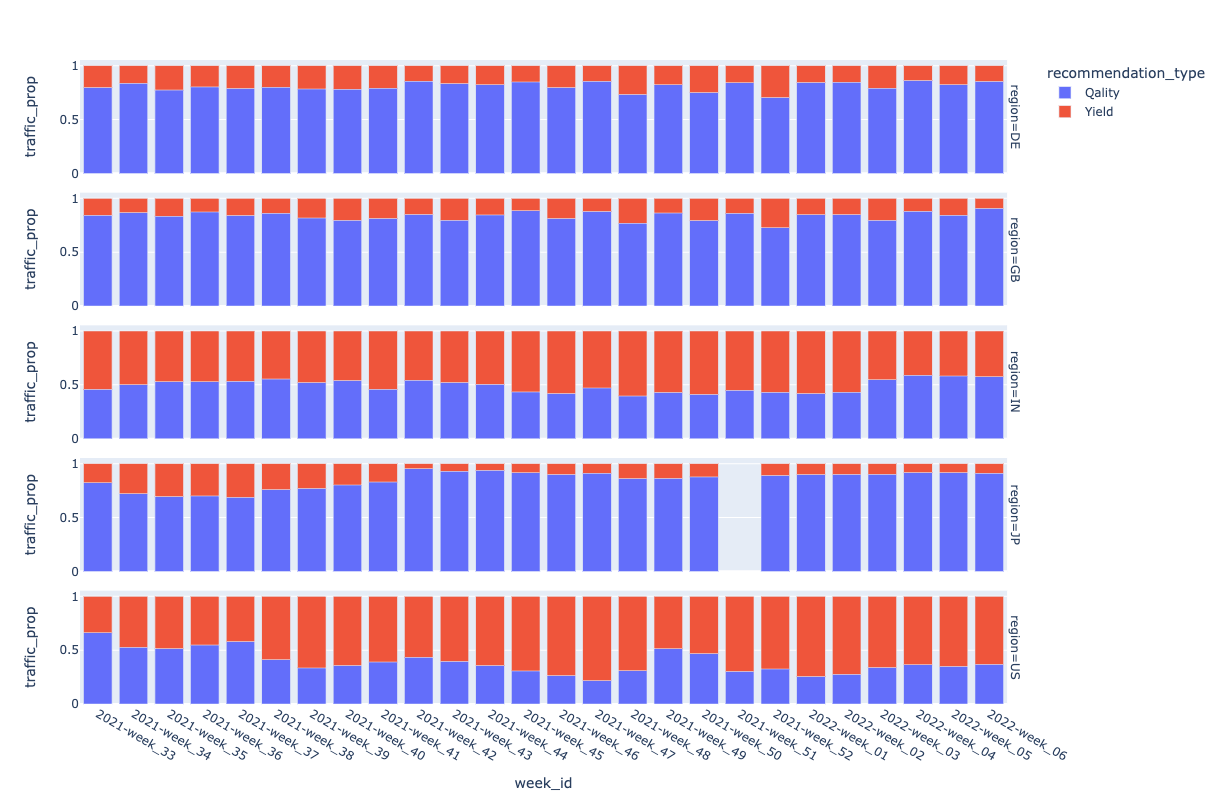

In [262]:
px.bar(traffic_prop_per_type_wow, x='week_id', y='traffic_prop', color='recommendation_type', facet_row='region', height=800)

Note we can see the missing data in JP, week 51.

#### Answer9

In [104]:
#############################
#9 - How many different requesters are there?
ad.requester.nunique()

36

#### Answer10

In [132]:
#############################
#10 - Which are the top 5 requesters per region?

In [266]:
ad.groupby('region').apply(lambda g: g.requester.value_counts().head())

region                        
DE      Search Million Culture    23657
        RelayFoods                17313
        MoJoe Brewing Company      8616
        iDreamsky Technology       3542
        SOLOMO365                  2435
GB      Search Million Culture    28002
        RelayFoods                15920
        Fancy                     13678
        MoJoe Brewing Company      9530
        iDreamsky Technology       3919
IN      Puentes Company           29427
        Search Million Culture    21365
        RelayFoods                17352
        MoJoe Brewing Company      7191
        iDreamsky Technology       1995
JP      RelayFoods                24574
        Search Million Culture     7906
        MoJoe Brewing Company      3549
        LocalVox Media             1724
        Tab Solutions              1366
US      Extreme DA                57215
        Fancy                     18668
        Tab Solutions              9790
        Search Million Culture     5610
        S

#### Answer11

In [267]:
##################################
# 11 - Which are the different rec_proivders?
ad.rec_provider.unique()

array(['DNNQ', 'DNNY', 'BooksQ', 'UserPopQ', 'UserPopY', 'RuleBasedY',
       'ManualY', 'ManualQ', 'BooksY', 'XGBQ', 'XGBY', 'RNNQ', 'RNNY',
       'RuleBased', 'UserPopSelectionQ', 'UserPopSelectionY'],
      dtype=object)

#### Answer12

In [268]:
##################################
#12 - Are there different rec providers per region?

In [269]:
ad.groupby('region').rec_provider.nunique()

region
DE     9
GB    12
IN     6
JP     9
US    14
Name: rec_provider, dtype: int64

By the numbers, the answer is clearly yes.

#### Answer13

In [271]:
##############################
#13 - Are there different rec providers per rec type?

In [279]:
quality_providers = set(ad[ad.recommendation_type == 'Qality'].rec_provider)
yield_providers =  set(ad[ad.recommendation_type == 'Yield'].rec_provider)

In [280]:
# Common providers to both types
quality_providers.intersection(yield_providers)

{'ManualQ', 'ManualY'}

In [281]:
# Unique providers for each type
print(f'Unique quality providers: {quality_providers - yield_providers}')
print(f'Unique yield providers: {yield_providers - quality_providers}')

Unique quality providers: {'RNNQ', 'RuleBased', 'UserPopQ', 'DNNQ', 'XGBQ', 'UserPopSelectionQ', 'BooksQ'}
Unique yield providers: {'UserPopY', 'RuleBasedY', 'RNNY', 'XGBY', 'DNNY', 'BooksY', 'UserPopSelectionY'}


#### Answer14

In [282]:
################################
#14 - What are the notation rules distinguishing between quality vs yielding providers?

We can see in most cases - if str includes "Y" in the end of the rec_provider name it is Yield and if "Q" Quality. But there are exceptions: ManualQ has (also) yield requests; ManualY has (also) quality. Also, RuleBased is quality only (should have been named: RuleBasedQ)

#### Answer15

In [140]:
###############################
#15 - Which is the most successful region of operation?

Here, you should refer to success rate (and not success count, as some regions are being sent to annotation more than others)

In [319]:
def calc_success_rate(data):
    import math
    annotated, success, failures = len(data), data.success.sum(), len(data) - data.success.sum()
    succes_rate = success / annotated
    se = math.sqrt((succes_rate*(1-succes_rate))/annotated)
    return pd.Series({
        'annotated': annotated,
        'succeses': success, 
        'failures': failures, 
        'success_rate': 100 * succes_rate,
        'success_rate_error': 100 * 1.96 * se * 2})
    

In [320]:
ad.groupby('region').apply(calc_success_rate).sort_values(by='success_rate', ascending=False)

,annotated,succeses,failures,success_rate,success_rate_error
region,,,,,
US,103846.0,88918.0,14928.0,85.624868,0.426773
GB,82984.0,69509.0,13475.0,83.761930,0.501856
DE,62177.0,50624.0,11553.0,81.419174,0.611459
JP,41627.0,31800.0,9827.0,76.392726,0.815920
IN,83154.0,63355.0,19799.0,76.189961,0.578993


We can see that the success rate in the US in the highest (85%). 

#### Answer16

In [321]:
###############################
#16 - Which is the most successful rec provider per each region?

In [322]:
prov_stats_per_region = ad.groupby(['region','rec_provider']).apply(calc_success_rate)
prov_stats_per_region.head()

annotated  succeses  failures  success_rate  \
region rec_provider                                                
DE     BooksQ           1353.0    1082.0     271.0     79.970436   
       BooksY           1257.0    1215.0      42.0     96.658711   
       DNNQ            32433.0   27215.0    5218.0     83.911448   
       DNNY             5417.0    4969.0     448.0     91.729740   
       ManualQ           968.0     830.0     138.0     85.743802   

                     success_rate_error  
region rec_provider                      
DE     BooksQ                  4.265183  
       BooksY                  1.986991  
       DNNQ                    0.799764  
       DNNY                    1.466970  
       ManualQ                 4.405058

Let's take the most successful provider per region:

In [323]:
prov_stats_per_region.groupby('region', as_index=False).apply(
    lambda g: g.sort_values(by='success_rate', ascending=False).head(1))

,,,annotated,succeses,failures,success_rate,success_rate_error
,region,rec_provider,,,,,
0,DE,BooksY,1257.0,1215.0,42.0,96.658711,1.986991
1,GB,RuleBased,40.0,39.0,1.0,97.500000,9.676725
2,IN,ManualQ,5293.0,5041.0,252.0,95.238995,1.147339
3,JP,ManualQ,697.0,651.0,46.0,93.400287,3.686433
4,US,BooksY,2893.0,2851.0,42.0,98.548220,0.871739


#### Answer21

In [324]:
#Q21 - Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region

In [325]:
prov_stats_per_region = ad.groupby(['region','recommendation_type']).apply(calc_success_rate)
prov_stats_per_region.head()

annotated  succeses  failures  success_rate  \
region recommendation_type                                                
DE     Qality                 50295.0   40572.0    9723.0     80.668058   
       Yield                  11882.0   10052.0    1830.0     84.598552   
GB     Qality                 69403.0   59018.0   10385.0     85.036670   
       Yield                  13581.0   10491.0    3090.0     77.247625   
IN     Qality                 40852.0   32932.0    7920.0     80.612944   

                            success_rate_error  
region recommendation_type                      
DE     Qality                         0.690259  
       Yield                          1.298086  
GB     Qality                         0.530780  
       Yield                          1.410185  
IN     Qality                         0.766722

#### Answer24

In [326]:
# Q24 - Present WoW table/graph with success rate and CI (see image below) per region and rec provider

In [327]:
prov_stats_per_region_wow = ad.groupby(['week_id','region']).apply(calc_success_rate)
prov_stats_per_region_wow.head()

annotated  succeses  failures  success_rate  \
week_id      region                                                
2021-week_33 DE         2395.0    1930.0     465.0     80.584551   
             GB         3180.0    2702.0     478.0     84.968553   
             IN         3196.0    2341.0     855.0     73.247810   
             JP         1611.0    1113.0     498.0     69.087523   
             US         3974.0    3528.0     446.0     88.777051   

                     success_rate_error  
week_id      region                      
2021-week_33 DE                3.168348  
             GB                2.484288  
             IN                3.069444  
             JP                4.513412  
             US                1.962800

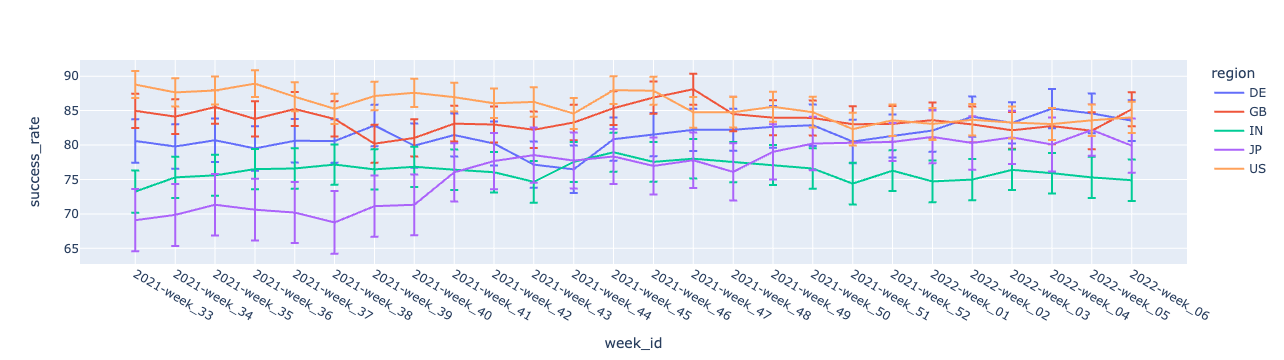

In [328]:
px.line(prov_stats_per_region_wow.reset_index(), x='week_id',y='success_rate',error_y='success_rate_error', color='region')

In [337]:
prov_stats_per_region_n_prov_wow = ad.groupby(['region', 'week_id', 'rec_provider']).apply(calc_success_rate)
prov_stats_per_region_n_prov_wow.head()

annotated  succeses  failures  success_rate  \
region week_id      rec_provider                                                
DE     2021-week_33 BooksQ             68.0      57.0      11.0     83.823529   
                    BooksY             40.0      39.0       1.0     97.500000   
                    DNNQ             1266.0    1048.0     218.0     82.780411   
                    DNNY              182.0     165.0      17.0     90.659341   
                    ManualQ            52.0      45.0       7.0     86.538462   

                                  success_rate_error  
region week_id      rec_provider                      
DE     2021-week_33 BooksQ                 17.504772  
                    BooksY                  9.676725  
                    DNNQ                    4.159531  
                    DNNY                    8.455619  
                    ManualQ                18.553948

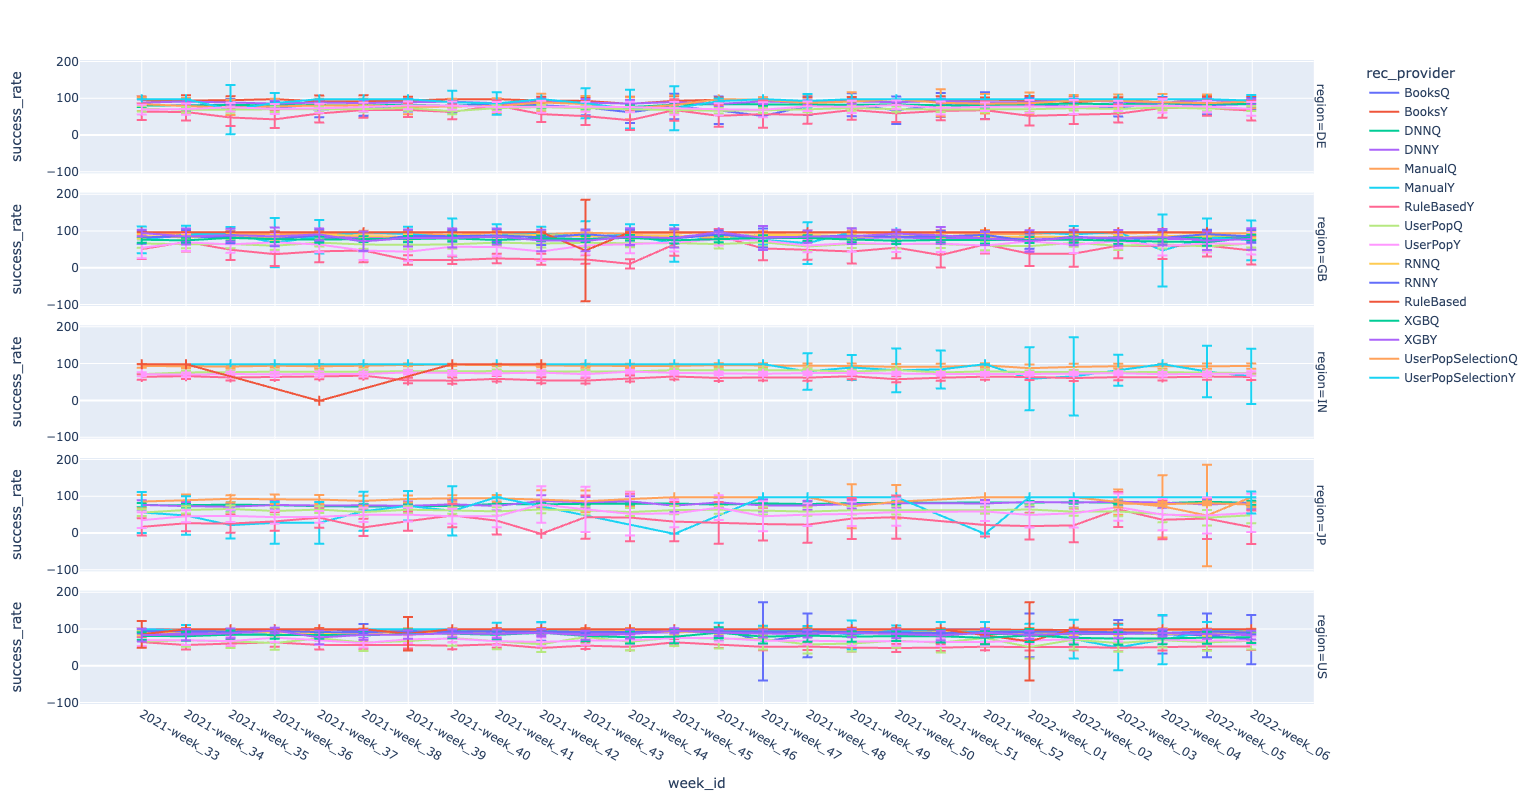

In [338]:
px.line(prov_stats_per_region_n_prov_wow.reset_index(), x='week_id',y='success_rate',error_y='success_rate_error', color='rec_provider',facet_row='region', height=800)

As can be seen, these graph is terrible to interperate. we can use widgets to help:

In [335]:
import ipywidgets as widgets

In [339]:
@widgets.interact
def plot_provider_success_rate_per_region(region=ad.region.unique()):
    data = prov_stats_per_region_n_prov_wow.loc[region].reset_index()
    return px.line(data, x='week_id',y='success_rate',error_y='success_rate_error', color='rec_provider', title=f'Providers success rate in region {region}')

interactive(children=(Dropdown(description='region', options=('DE', 'GB', 'IN', 'JP', 'US'), value='DE'), Outp…

#### Answer25

In [ ]:
# Q25 - Which are the requester to which we succeed the most?

In [342]:
success_rate_by_requester = ad.groupby('requester').apply(calc_success_rate).sort_values(by='success_rate', ascending=False)
success_rate_by_requester.head()

,annotated,succeses,failures,success_rate,success_rate_error
requester,,,,,
Marketo Japan,1.0,1.0,0.0,100.0,0.0
FlagTap,2.0,2.0,0.0,100.0,0.0
Cue,4.0,4.0,0.0,100.0,0.0
Derceto,1.0,1.0,0.0,100.0,0.0
Altammune,5.0,5.0,0.0,100.0,0.0


But those are almost not annotated. Let's consider only requesters with >100 annotated values:

In [343]:
success_rate_by_requester.query('annotated > 100').head()

,annotated,succeses,failures,success_rate,success_rate_error
requester,,,,,
PageBites,135.0,123.0,12.0,91.111111,9.601268
"Doctorfun Entertainment, Ltd",204.0,182.0,22.0,89.215686,8.513102
Tab Solutions,13294.0,11829.0,1465.0,88.979991,1.064622
Mission Street Manufacturing,186.0,164.0,22.0,88.172043,9.282178
Fancy,32346.0,28519.0,3827.0,88.168553,0.703966


#### Answer29

In [ ]:
#Q29 - Preset a WoW graph showing the number of requests per customer in each region (hint: use stacked bars), from it:

In [354]:
requests_prop_per_region_n_customer = ad.groupby(['region','week_id']).requester.value_counts(normalize=True).rename('traffic_prop')
requests_prop_per_region_n_customer.head()

region  week_id       requester             
DE      2021-week_33  Search Million Culture    0.475574
                      MoJoe Brewing Company     0.156159
                      SOLOMO365                 0.131942
                      RelayFoods                0.128184
                      Fry Multimedia            0.034238
Name: traffic_prop, dtype: float64

In [345]:
# Option 1:

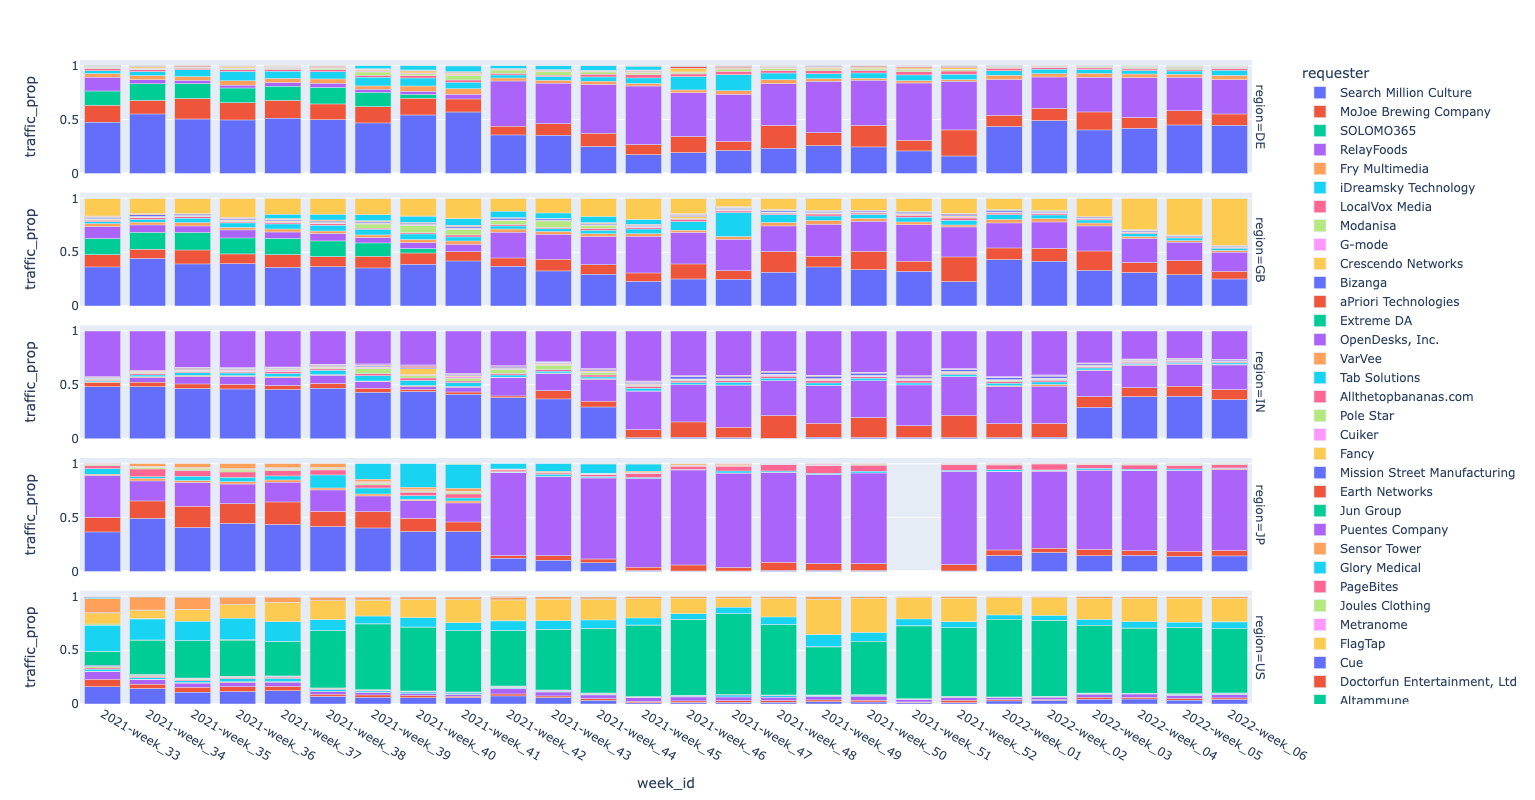

In [352]:
px.bar(requests_prop_per_region_n_customer.reset_index(), x='week_id',y='traffic_prop', color='requester', facet_row='region', height=800)

In [350]:
#option 2:

In [357]:
@widgets.interact
def plot_traffic_prop_per_region(region = ad.region.unique()):
    data = requests_prop_per_region_n_customer.loc[region].reset_index()
    return px.bar(data, x='week_id',y='traffic_prop', color='requester', title=f'Traffic proprtion by requester at region {region}')

interactive(children=(Dropdown(description='region', options=('DE', 'GB', 'IN', 'JP', 'US'), value='DE'), Outp…

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [ ]:
#annotation -> ad_id is primary key (row definer)
#in the merges -> make sure no duplication in the data

In [287]:
import os
#weekly_files = sorted(os.listdir('data/weekly/'))
#sorted(weekly_files)[:10]

Your task is to reconstruct the dataset above. 

#### Answer to Merges and Joins

In [359]:
import os
weekly_files = os.listdir('data/Final assigment/weekly/')
sorted(weekly_files)[:10]

['2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv',
 '2021_33_JP_Qality_annotation_result.csv']